In [1]:
import pandas as pd

In [2]:
taxi = pd.read_csv('2020_Green_Taxi_Trip_Data.csv')

In [3]:
taxi

,Month,Passengers,Tips,Prices
0,January,2.0,1.28,24.36
1,January,1.0,2.47,15.34
2,January,2.0,6.30,25.05
3,January,1.0,2.30,11.30
4,January,1.0,3.00,14.80
...,...,...,...,...
1048570,October,NaN,2.70,9.58
1048571,October,NaN,1.70,8.30
1048572,October,NaN,8.41,19.79
1048573,October,NaN,0.36,8.00


In [4]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\python\python.exe -m pip install --upgrade pip' command.


In [5]:
import pyspark as spark
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from pyspark import SparkContext, SQLContext

In [7]:
sc = SparkContext()
s = SQLContext(sc)

In [8]:
data = s.read.options(header=True).csv('2020_Green_Taxi_Trip_Data.csv')
data.createOrReplaceTempView("data")

In [9]:
data.printSchema()

root
 |-- Month: string (nullable = true)
 |-- Passengers: string (nullable = true)
 |-- Tips: string (nullable = true)
 |-- Prices: string (nullable = true)



In [10]:
data.groupBy("Month").count().show(12)

+---------+------+
|    Month| count|
+---------+------+
|     July| 90948|
| November| 65688|
| February|104994|
|  January|102551|
|    March|106102|
|  October| 70905|
|      May|101835|
|   August| 68844|
|    April|105683|
|     June| 90135|
| December| 67654|
|September| 73236|
+---------+------+



In [11]:
data_list = data.groupBy("Month").count().collect()

In [12]:
print(data_list[0])

Row(Month='July', count=90948)


In [13]:
import matplotlib.pyplot as plt

In [14]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
k1 = [0,0,0,0,0,0,0,0,3,0,0,0]

In [15]:
for i in data_list:
    if i['Month'] == 'January':
        k1[0] = i['count']
    elif i['Month'] == 'February':
        k1[1] = i['count']
    elif i['Month'] == 'March':
        k1[2] = i['count']
    elif i['Month'] == 'April':
        k1[3] = i['count']
    elif i['Month'] == 'May':
        k1[4] = i['count']
    elif i['Month'] == 'June':
        k1[5] = i['count']
    elif i['Month'] == 'July':
        k1[6] = i['count']
    elif i['Month'] == 'August':
        k1[7] = i['count']
    elif i['Month'] == 'September':
        k1[8] = i['count']
    elif i['Month'] == 'October':
        k1[9] = i['count']
    elif i['Month'] == 'November':
        k1[10] = i['count']
    elif i['Month'] == 'December':
        k1[11] = i['count']

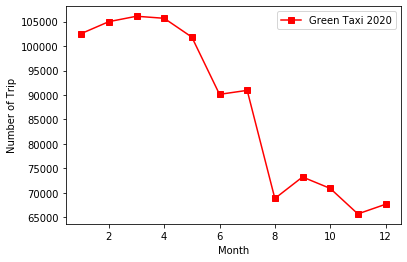

In [16]:
plt.plot(x,k1,'s-',color = 'r',label="Green Taxi 2020")
plt.xlabel("Month")
plt.ylabel("Number of Trip")
plt.legend(loc = "best")
plt.show()